# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


660

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [ ]:
# set up lists to hold reponse info
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed= []
country= []
date = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except:
        lat.append("NA")
        lng.append("NA")
        max_temp.append("NA")
        humidity.append("NA")
        cloudiness.append("NA")
        wind_speed.append("NA")
        country.append("NA")
        date.append("NA")

# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {max_temp}")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
#convert to dictionary
weather_dict = { 
    "City": cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date}
weather_df = pd.DataFrame(weather_dict)
weather_df

In [75]:
# export to csv
weather_df.to_csv("weather.csv")

In [3]:
# import csv back and show dataframe
weather_csv_df = "weather.csv"
weather_f_df = pd.read_csv(weather_csv_df)
weather_f_df = weather_f_df.drop(weather_f_df.columns[[0]], axis=1) 
weather_f_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.74,-97.86,12.00,76.0,75.0,2.10,CA,1.598727e+09
1,banda aceh,5.56,95.32,26.61,78.0,91.0,1.67,ID,1.598727e+09
2,carutapera,-1.20,-46.02,29.66,63.0,28.0,5.44,BR,1.598727e+09
3,khatanga,71.97,102.50,9.53,74.0,62.0,3.69,RU,1.598727e+09
4,carnarvon,-24.87,113.63,16.00,67.0,0.0,5.70,AU,1.598727e+09
...,...,...,...,...,...,...,...,...,...
616,mizdah,31.45,12.98,29.40,18.0,0.0,4.96,LY,1.598727e+09
617,curup,-3.47,102.53,20.31,90.0,96.0,1.62,ID,1.598727e+09
618,eyl,7.98,49.82,25.65,75.0,0.0,10.02,SO,1.598727e+09
619,belyy yar,53.60,91.39,12.00,93.0,0.0,1.00,RU,1.598727e+09


In [4]:
# get stats
weather_f_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.00000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,19.337536,20.46850,19.858857,70.846429,51.380357,3.775750,1.598727e+09
std,33.578793,91.65602,8.211394,20.195679,40.449177,2.646186,8.153176e+01
min,-54.800000,-179.17000,-0.460000,8.000000,0.000000,0.200000,1.598727e+09
25%,-8.950000,-62.21250,12.987500,61.000000,2.750000,1.847500,1.598727e+09
50%,22.065000,26.64500,21.555000,76.000000,54.500000,3.100000,1.598727e+09
75%,48.857500,102.55750,26.000000,86.000000,93.000000,5.152500,1.598727e+09
max,78.220000,179.32000,42.530000,100.000000,100.000000,14.900000,1.598727e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#There were no cities with humidity over 100% when I pulled the data, but I did still do a reduction that got rid of the NaNs and would have removed the values over 100.
#I was not able to do the second portion of this questions without the values over 100. 
hum_df = weather_f_df.loc[weather_f_df['Humidity'] <= 100]
hum_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.74,-97.86,12.00,76.0,75.0,2.10,CA,1.598727e+09
1,banda aceh,5.56,95.32,26.61,78.0,91.0,1.67,ID,1.598727e+09
2,carutapera,-1.20,-46.02,29.66,63.0,28.0,5.44,BR,1.598727e+09
3,khatanga,71.97,102.50,9.53,74.0,62.0,3.69,RU,1.598727e+09
4,carnarvon,-24.87,113.63,16.00,67.0,0.0,5.70,AU,1.598727e+09
...,...,...,...,...,...,...,...,...,...
616,mizdah,31.45,12.98,29.40,18.0,0.0,4.96,LY,1.598727e+09
617,curup,-3.47,102.53,20.31,90.0,96.0,1.62,ID,1.598727e+09
618,eyl,7.98,49.82,25.65,75.0,0.0,10.02,SO,1.598727e+09
619,belyy yar,53.60,91.39,12.00,93.0,0.0,1.00,RU,1.598727e+09


In [6]:
hum_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.00000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,19.337536,20.46850,19.858857,70.846429,51.380357,3.775750,1.598727e+09
std,33.578793,91.65602,8.211394,20.195679,40.449177,2.646186,8.153176e+01
min,-54.800000,-179.17000,-0.460000,8.000000,0.000000,0.200000,1.598727e+09
25%,-8.950000,-62.21250,12.987500,61.000000,2.750000,1.847500,1.598727e+09
50%,22.065000,26.64500,21.555000,76.000000,54.500000,3.100000,1.598727e+09
75%,48.857500,102.55750,26.000000,86.000000,93.000000,5.152500,1.598727e+09
max,78.220000,179.32000,42.530000,100.000000,100.000000,14.900000,1.598727e+09


In [83]:

# max_humid = weather_f_df[weather_f_df['Humidity'] > 100]
# max_humid

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.



Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

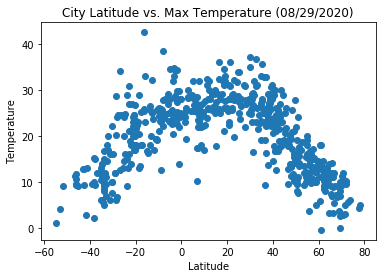

In [41]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_f_df['Lat']
y_values = weather_f_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title(f"City Latitude vs. Max Temperature (08/29/2020)")
plt.show()

## Latitude vs. Humidity Plot

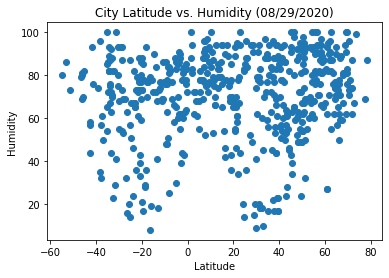

In [42]:
x_values = weather_f_df['Lat']
y_values = weather_f_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"City Latitude vs. Humidity (08/29/2020)")
plt.show()

## Latitude vs. Cloudiness Plot

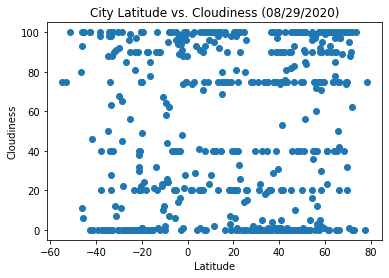

In [43]:
x_values = weather_f_df['Lat']
y_values = weather_f_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"City Latitude vs. Cloudiness (08/29/2020)")
plt.show()

## Latitude vs. Wind Speed Plot

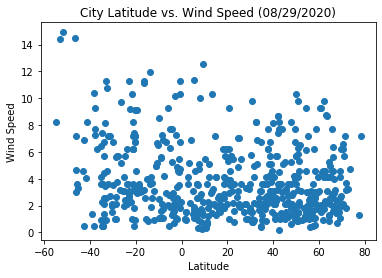

In [44]:
x_values = weather_f_df['Lat']
y_values = weather_f_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f"City Latitude vs. Wind Speed (08/29/2020)")
plt.show()

## Linear Regression

In [8]:
#create northen and southern hemisphere dfs

southern_df = weather_f_df[weather_f_df['Lat'] < 0]
northern_df = weather_f_df[weather_f_df['Lat'] > 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5985968759068334


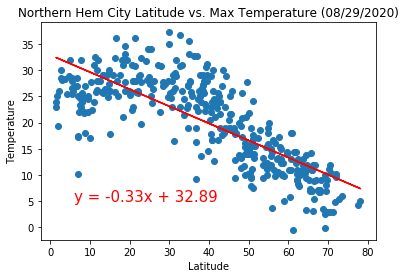

In [9]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,5),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
#add labels
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title(f"Northern Hem City Latitude vs. Max Temperature (08/29/2020)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.55642092571244


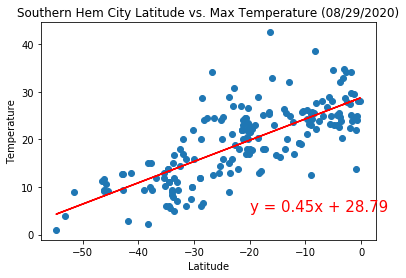

In [85]:
### WHy is it that I did an exact copy and the line annotation didn't show? ###

x_values = southern_df['Lat']
y_values = southern_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,5),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

#add labels
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title(f"Southern Hem City Latitude vs. Max Temperature (08/29/2020)")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0013048125776834304


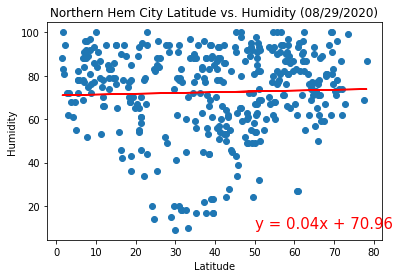

In [86]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
#add labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"Northern Hem City Latitude vs. Humidity (08/29/2020)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 6.355835845374378e-05


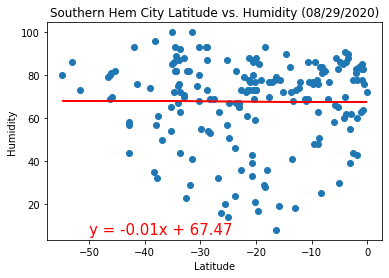

In [63]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,6),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

#add labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"Southern Hem City Latitude vs. Humidity (08/29/2020)")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.008404781189771978


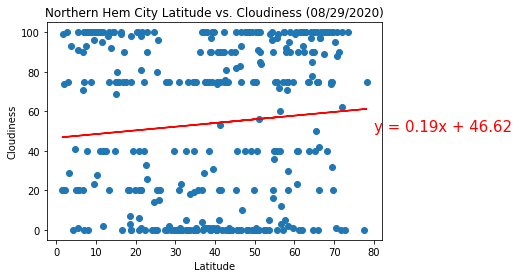

In [87]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,50),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
#add labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"Northern Hem City Latitude vs. Cloudiness (08/29/2020)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00692839668676582


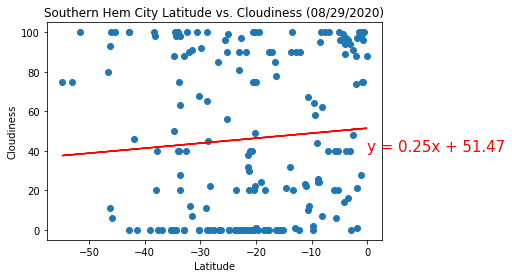

In [88]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

#add labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"Southern Hem City Latitude vs. Cloudiness (08/29/2020)")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003240337669491026


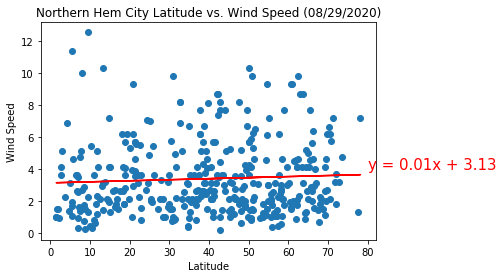

In [89]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,4),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
#add labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f"Northern Hem City Latitude vs. Wind Speed (08/29/2020)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02751262000155166


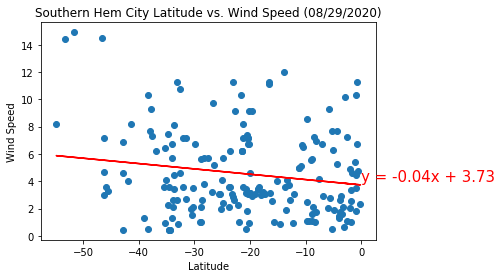

In [90]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,4),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

#add labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f"Southern Hem City Latitude vs. Wind Speed (08/29/2020)")
plt.show()